In [1]:
import sys
sys.path.append('/Users/lindsaybassman/Documents/LBL/ArQTiC')
from arqtic.simulation_generator import Simulation_Generator
from arqtic.QITE import make_QITE_circ, get_state_from_string
import matplotlib.pyplot as plt
import numpy as np
import qiskit as qk
from qiskit import Aer, IBMQ, execute
from arqtic.arqtic_for_ibm import run_ibm, get_ibm_circuit, add_prog_to_ibm_circuit
from arqtic.program import Program, random_bitstring
import random

In [12]:
#create simulation object
sim_obj = Simulation_Generator("QITE_input.txt")

In [13]:
#connect to IBM
#if this is your first run enter your API key
#sim_obj.connect_IBM(api_key="c2629e2a2595c888d4b84e5fc15e8756ccf2e3af6f5eb7525beaee93ce017ecb7581cf3c74c8de44a88b2a554ecc7d82be52ac9e358430de782be155e4586195")

In [14]:
#generate circuits
N = sim_obj.num_spins
qr = qk.QuantumRegister(N, name='q')
# classical 1 bit readout register
cr = qk.ClassicalRegister(N, name='c')
# our combined circuit
qite_circ = qk.QuantumCircuit(qr, cr)
qite_circ, energies = make_QITE_circ(sim_obj, qite_circ, regularizer=0.0)

No handles with labels found to put in legend.


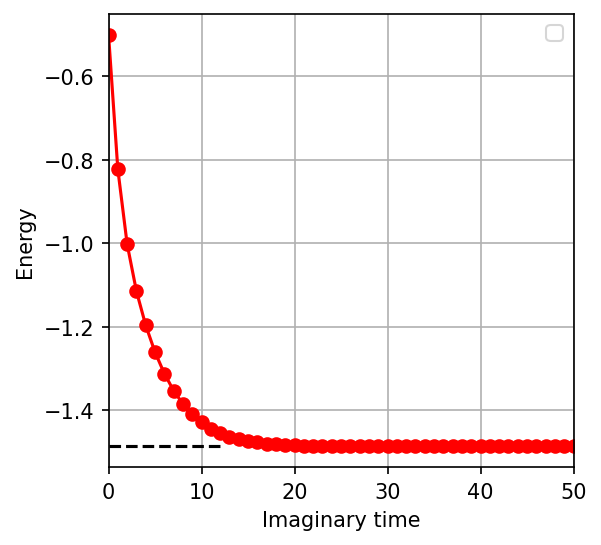

In [16]:
plt.figure(figsize=[4,4], dpi=150)
#plt.plot(np.arange(0,num_beta+1)*dbeta,E,'-ro',label='QITE')
plt.plot(energies,'-ro')
#plt.axhline(y=w[0], color='k',linestyle='--',label="Ground state")
#plt.title("QITE")
plt.xlabel("Imaginary time")
plt.ylabel("Energy")
plt.hlines(-1.4865556615119306, 0, 12, color="black", linestyles='dashed')
#plt.hlines(-0.765066890160599, 0, 100, color="black", linestyles='dashed')
plt.grid()
plt.xlim(0,50)

plt.legend(bbox_to_anchor=(1.0,1.0))
#plt.show()
plt.savefig('QITE_GSenergy.png')